## Heathrow Airport Study: Flights and Pollution Analysis

This notebook will test whether there is a relationship between the number of arrival/departure flights from Heathrow Airport and air pollution recorded in select NHS CCGs. 

Method: A linear regression will be used and the P value will be tested for significance. 

Analysis Assumptions 

> * Null Hypothesis: There is no relationship between  arrival/departure flights from Heathrow Airport and air pollutant indicators 
> * Alternative Hypothesis: There is a relationship between arrival/departure flights from Heathrow Airport and air pollution indicators 
> * Regression Analysis: Linear (single on flights vs PM10 and flights vs Nitrogen Dioxide ), using the Ordinary Least Squares method.
> * Data - Number of Flights (arrival/departure flights from Heathrow Airport)
> * Data - Air Pollution indicators - Nitrogen Dioxide and PM10 particulate matter recordings

**Summary:** 
* The initial scatter plots did not denote a clear relationship between the air pollutants and flights.

* The visualisations and regression line gradients did not infer that there was correlation between the air pollutants and flights. 

* For each air pollutant indicator (Nitrogen dioxide and PM10), the observed p-value from each coefficient in the analysis was greater than 5% significance, the team can therefore accept the Null Hypothesis which supports there is no relationship between flights and the indicators. 
 
* From the summaries we can also see that R-squared (the coefficient of determination) is very close to 0 for both pollution indicators, indicating that the regression model has room for improvement.


**Recommendations:**
* Attempt alternative regressions in follow-on studies. 
  

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols


### 1. Read in / Manipulate Datasets 

In [4]:
# load in the required datasets
flights = pd.read_csv('../cleaned_flight_data.csv', encoding='utf-8')
pollution = pd.read_csv('data_treatment_model_ready/pollution_ccg_model_wide.csv', encoding='utf-8')

In [7]:
# fix the datasets
flights.rename(columns={'Unnamed: 0': 'Year', 'number of flights': 'nr_flights_thou'}, inplace=True)
pollution.drop(columns=['Unnamed: 0'], inplace=True)

# transform flights into easier uni (thousands)
flights['nr_flights_thou'] = flights['nr_flights_thou'] / 1000


# make flights and pollution years consistent 
#(so we can map them for model analysis)
flights = flights[flights['Year'] >= 2004]
print(flights.Year.unique())
pollution = pollution[pollution['Year'] < 2020]
print(pollution.Year.unique())


NameError: name 'flights' is not defined

In [6]:
# we need to join the pollution x flights datasets, so we have the same number of points
pollution_flights = pd.merge(
    pollution, 
    flights, 
    how='left', 
    on='Year'
)

Following on from the data cleaning process, we will remove NaNs (because the team is focused on measuring pollution and flights, years with no pollution observations have no meaningful value).

In [7]:
pollution_flights_no2 = pollution_flights.copy().dropna(subset=['Nitrogen dioxide'])
pollution_flights_pm10 = pollution_flights.copy().dropna(subset=['PM10'])

## Simple Linear Regression 

We will apply the regression following the equation
>> `y = B0 + B1x`

Where Y is the TARGET - pollutant (Nitrogen dioxide/ PM10), X is the feature (number of flights) and B0/B1 are the coefficients.

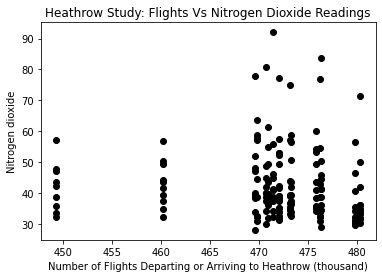

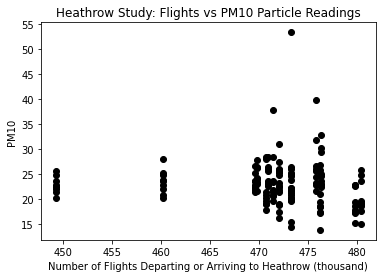

The initial scatter plots below do not denote a clear relationship between the 
pllutants and flights, further analysis via regression will be applied.


In [8]:
# First, visualise the data distribution
plt.figure(figsize=(6,4))
plt.scatter(
    pollution_flights_no2['nr_flights_thou'],
    pollution_flights_no2['Nitrogen dioxide'],
    c='black',
)
plt.xlabel('Number of Flights Departing or Arriving to Heathrow (thousand)')
plt.ylabel('Nitrogen dioxide')
plt.title('Heathrow Study: Flights Vs Nitrogen Dioxide Readings')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(
    pollution_flights_pm10['nr_flights_thou'],
    pollution_flights_pm10['PM10'],
    c='black'
)
plt.xlabel('Number of Flights Departing or Arriving to Heathrow (thousand)')
plt.ylabel('PM10')
plt.title('Heathrow Study: Flights vs PM10 Particle Readings')

plt.show()


print('''The initial scatter plots below do not denote a clear relationship between the 
pllutants and flights, further analysis via regression will be applied.''')

The linear model for Nitrogen Dioxide and flights is is: Y = 90.899 + -0.10201X


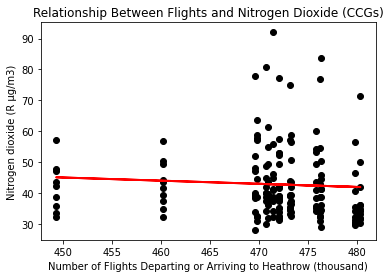

In [9]:
# run analysis for Nitrogen Dioxide and flights
X = pollution_flights_no2['nr_flights_thou'].values.reshape(-1,1)
Y = pollution_flights_no2['Nitrogen dioxide'].values.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

print("The linear model for Nitrogen Dioxide and flights is is: Y = {:.5} + {:.5}X"
      .format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))


predictions = lin_reg.predict(X)


plt.scatter(
    pollution_flights_no2['nr_flights_thou'],
    pollution_flights_no2['Nitrogen dioxide'],
    c='black'
)
plt.plot(
    pollution_flights_no2['nr_flights_thou'],
    predictions,
    c='red',
    linewidth=2
)


plt.xlabel('Number of Flights Departing or Arriving to Heathrow (thousand)')
plt.ylabel('Nitrogen dioxide (R µg/m3)')
plt.title('Relationship Between Flights and Nitrogen Dioxide (CCGs)')
plt.show()


The visualisation and the regression, line gradient (-0.10201) infers that Nitrogen dioxide air pollutant readings and flights are not correlated. The negative gradient is unexpected and goes against the alternate hypothesis. The team will further assess the model and coeffients below. 

The linear model for Nitrogen Dioxide and flights is is: Y = 47.603 + -0.052046X


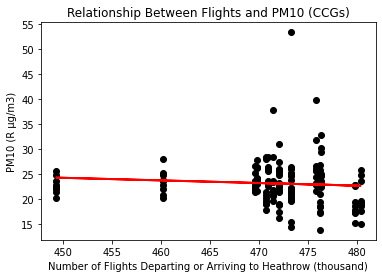

In [10]:
# run analysis for PM10 and flights

X_1 = pollution_flights_pm10['nr_flights_thou'].values.reshape(-1,1)
Y_1 = pollution_flights_pm10['PM10'].values.reshape(-1,1)

lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_1, Y_1)

print("The linear model for Nitrogen Dioxide and flights is is: Y = {:.5} + {:.5}X"
      .format(lin_reg_1.intercept_[0], lin_reg_1.coef_[0][0]))


predictions = lin_reg_1.predict(X_1)


plt.scatter(
    pollution_flights_pm10['nr_flights_thou'],
    pollution_flights_pm10['PM10'],
    c='black'
)
plt.plot(
    pollution_flights_pm10['nr_flights_thou'],
    predictions,
    c='red',
    linewidth=2
)

plt.xlabel('Number of Flights Departing or Arriving to Heathrow (thousand)')
plt.ylabel('PM10 (R µg/m3)')
plt.title('Relationship Between Flights and PM10 (CCGs)')
plt.show()


The visualisation and the regression line gradient (-0.052046) infers that PM10 air pollutant readings and flights are not correlated. The team will further assess the model and coeffients below. 

### Assess the Model relevancy - R^2 and P value 

In [11]:
print('Outputting regression summary results for Nitrogen Dioxide and Flights \n')
X = pollution_flights_no2['nr_flights_thou']
Y = pollution_flights_no2['Nitrogen dioxide']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

Outputting regression summary results for Nitrogen Dioxide and Flights 

                            OLS Regression Results                            
Dep. Variable:       Nitrogen dioxide   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6059
Date:                Fri, 12 Feb 2021   Prob (F-statistic):              0.438
Time:                        15:47:25   Log-Likelihood:                -617.16
No. Observations:                 159   AIC:                             1238.
Df Residuals:                     157   BIC:                             1244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

As the observed p-value from each coefficient is greater than 5% significance, we can accept the Null Hypothesis which supports there is no relationship between flights and Nitrogen Dioxide.

From the summary we can see that R-squared (the coefficient of determination) is very close to 0, indicating that the regression model could be improved.

In [12]:
print('Outputting regression summary results for PM10 particulate matter and Flights \n')
X = pollution_flights_pm10['nr_flights_thou']
Y = pollution_flights_pm10['PM10']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())



Outputting regression summary results for PM10 particulate matter and Flights 

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8558
Date:                Fri, 12 Feb 2021   Prob (F-statistic):              0.357
Time:                        15:47:25   Log-Likelihood:                -418.76
No. Observations:                 141   AIC:                             841.5
Df Residuals:                     139   BIC:                             847.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

As the observed p-value from each coefficient is greater than 5% significance, we can accept the Null Hypothesis which supports there is no relationship between flights and Nitrogen Dioxide.

From the summary we can see that R-squared (the coefficient of determination) is very close to 0, indicating that the regression model could be improved.

### Running pollution on Flight Monitoring Stations Closer to Heathrow

In [13]:
poll_stations = pd.read_csv('../data_final/pollution_wide.csv')
# flights_1 = pd.read_csv('../cleaned_flight_data.csv', encoding='utf-8')
# flights_1.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
poll_stations.head()

,Unnamed: 0,Location,Date,Carbon monoxide,Nitric Oxide,Nitrogen dioxide,Oxides of Nitrogen,Ozone,PM10 Particulate matter,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured),Sulphur dioxide,CCG,lat/long,distance_from_LHR,Radius
0,0,Hounslow 2 - Cranford,2004,NaN,19.366907,35.637110,65.183649,31.628426,22.091612,NaN,NaN,3.611565,Hounslow,"[51.4686132, -0.3613471]",6.440137,Inner
1,1,Hounslow 2 - Cranford,2005,NaN,19.282252,37.730687,66.993132,34.426010,22.159977,NaN,NaN,3.959997,Hounslow,"[51.4686132, -0.3613471]",6.440137,Inner
2,2,Hounslow 2 - Cranford,2006,NaN,16.322724,37.439653,62.493307,41.626836,22.695308,NaN,NaN,3.018580,Hounslow,"[51.4686132, -0.3613471]",6.440137,Inner
3,3,Hounslow 2 - Cranford,2007,NaN,22.751626,34.516199,69.260681,31.764437,21.877800,NaN,NaN,2.886371,Hounslow,"[51.4686132, -0.3613471]",6.440137,Inner
4,4,Hounslow 2 - Cranford,2008,NaN,19.463412,36.025263,65.728967,36.527434,19.221030,NaN,NaN,3.046298,Hounslow,"[51.4686132, -0.3613471]",6.440137,Inner


In [14]:
heathrow = ['Heathrow Bath Road', 'Heathrow Green Gates', 'Heathrow LHR2', 'Heathrow Oaks Road']
poll_stations_heathrow = poll_stations[poll_stations['Location'].isin(heathrow)]

# make flights and pollution years consistent 
#(so we can map them for model analysis)
poll_stations_heathrow = poll_stations_heathrow[poll_stations_heathrow['Date'] < 2020]
print(pollution.Year.unique())

# remove erroneous column
poll_stations_heathrow = poll_stations_heathrow.drop(columns=['Unnamed: 0'])

#merge to flights set 
poll_stations_flights = pd.merge(poll_stations_heathrow, flights, how='left', left_on='Date', right_on='Year')

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


In [15]:
poll_stations_flights.head(10)

,Location,Date,Carbon monoxide,Nitric Oxide,Nitrogen dioxide,Oxides of Nitrogen,Ozone,PM10 Particulate matter,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured),Sulphur dioxide,CCG,lat/long,distance_from_LHR,Radius,Year,nr_flights_thou
0,Heathrow Bath Road,2019,NaN,NaN,48.189488,NaN,NaN,NaN,14.179841,9.391114,NaN,Hillingdon,"[51.4814078, -0.4625284]",1.388736,Inner,2019,479.811
1,Heathrow Green Gates,2004,NaN,NaN,38.747583,NaN,NaN,NaN,26.235829,12.248356,NaN,Hillingdon,"[51.481478, -0.486675]",2.579208,Inner,2004,469.786
2,Heathrow Green Gates,2005,NaN,NaN,36.113788,NaN,NaN,NaN,25.333651,12.105307,NaN,Hillingdon,"[51.481478, -0.486675]",2.579208,Inner,2005,472.041
3,Heathrow Green Gates,2006,NaN,NaN,37.461843,NaN,NaN,NaN,26.606187,12.929494,NaN,Hillingdon,"[51.481478, -0.486675]",2.579208,Inner,2006,470.891
4,Heathrow Green Gates,2007,NaN,NaN,38.126009,NaN,NaN,NaN,24.830508,15.052292,NaN,Hillingdon,"[51.481478, -0.486675]",2.579208,Inner,2007,475.789
5,Heathrow Green Gates,2008,NaN,NaN,37.859867,NaN,NaN,NaN,18.301840,10.945687,NaN,Hillingdon,"[51.481478, -0.486675]",2.579208,Inner,2008,473.207
6,Heathrow Green Gates,2009,NaN,NaN,37.582796,NaN,NaN,NaN,17.569190,10.052333,NaN,Hillingdon,"[51.481478, -0.486675]",2.579208,Inner,2009,460.178
7,Heathrow Green Gates,2010,NaN,NaN,41.349396,NaN,NaN,NaN,18.182089,9.888420,NaN,Hillingdon,"[51.481478, -0.486675]",2.579208,Inner,2010,449.271
8,Heathrow Green Gates,2011,NaN,NaN,34.730466,NaN,NaN,NaN,20.415322,10.167959,NaN,Hillingdon,"[51.481478, -0.486675]",2.579208,Inner,2011,476.295
9,Heathrow Green Gates,2012,NaN,NaN,33.584104,NaN,NaN,NaN,19.370532,9.864725,NaN,Hillingdon,"[51.481478, -0.486675]",2.579208,Inner,2012,471.382


In [16]:
pollution_flights_no2 = poll_stations_flights.copy()[['Date', 'nr_flights_thou', 'Nitrogen dioxide']].dropna(subset=['Nitrogen dioxide'])
pollution_flights_pm10 = poll_stations_flights.copy()[['Date', 'nr_flights_thou', 'PM10 particulate matter (Hourly measured)']].dropna(subset=['PM10 particulate matter (Hourly measured)'])

The linear model for Nitrogen Dioxide and flights is is: Y = 132.1 + -0.19745X


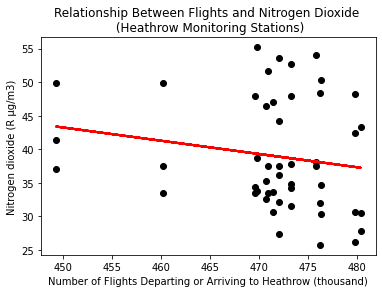

In [17]:
poll_flight_no2 = poll_stations_flights

# run analysis for Nitrogen Dioxide and flights
X = pollution_flights_no2['nr_flights_thou'].values.reshape(-1,1)
Y = pollution_flights_no2['Nitrogen dioxide'].values.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

print("The linear model for Nitrogen Dioxide and flights is is: Y = {:.5} + {:.5}X"
      .format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))


predictions = lin_reg.predict(X)


plt.scatter(
    pollution_flights_no2['nr_flights_thou'],
    pollution_flights_no2['Nitrogen dioxide'],
    c='black'
)
plt.plot(
    pollution_flights_no2['nr_flights_thou'],
    predictions,
    c='red',
    linewidth=2
)


plt.xlabel('Number of Flights Departing or Arriving to Heathrow (thousand)')
plt.ylabel('Nitrogen dioxide (R µg/m3)')
plt.title('Relationship Between Flights and Nitrogen Dioxide \n (Heathrow Monitoring Stations)')
plt.show()

The linear model for Nitrogen Dioxide and flights is is: Y = 110.68 + -0.19179X


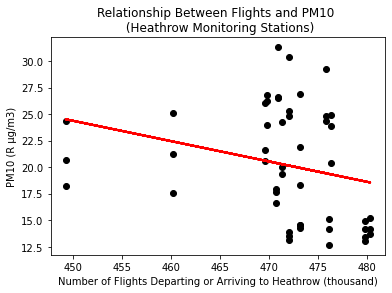

In [18]:
# run analysis for PM10 and flights

X_1 = pollution_flights_pm10['nr_flights_thou'].values.reshape(-1,1)
Y_1 = pollution_flights_pm10['PM10 particulate matter (Hourly measured)'].values.reshape(-1,1)

lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_1, Y_1)

print("The linear model for Nitrogen Dioxide and flights is is: Y = {:.5} + {:.5}X"
      .format(lin_reg_1.intercept_[0], lin_reg_1.coef_[0][0]))


predictions = lin_reg_1.predict(X_1)


plt.scatter(
    pollution_flights_pm10['nr_flights_thou'],
    pollution_flights_pm10['PM10 particulate matter (Hourly measured)'],
    c='black'
)
plt.plot(
    pollution_flights_pm10['nr_flights_thou'],
    predictions,
    c='red',
    linewidth=2
)

plt.xlabel('Number of Flights Departing or Arriving to Heathrow (thousand)')
plt.ylabel('PM10 (R µg/m3)')
plt.title('Relationship Between Flights and PM10 \n (Heathrow Monitoring Stations)')
plt.show()


In [19]:
print('Outputting regression summary results for Nitrogen Dioxide and Flights \n')
X = pollution_flights_no2['nr_flights_thou']
Y = pollution_flights_no2['Nitrogen dioxide']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

Outputting regression summary results for Nitrogen Dioxide and Flights 

                            OLS Regression Results                            
Dep. Variable:       Nitrogen dioxide   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.507
Date:                Fri, 12 Feb 2021   Prob (F-statistic):              0.226
Time:                        15:47:26   Log-Likelihood:                -171.70
No. Observations:                  49   AIC:                             347.4
Df Residuals:                      47   BIC:                             351.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [20]:
pollution_flights_pm10.rename(columns={'PM10 particulate matter (Hourly measured)':'PM10'}, inplace=True)
print('Outputting regression summary results for PM10 particulate matter and Flights \n')
X = pollution_flights_pm10['nr_flights_thou']
Y = pollution_flights_pm10['PM10']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())


Outputting regression summary results for PM10 particulate matter and Flights 

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     3.442
Date:                Fri, 12 Feb 2021   Prob (F-statistic):             0.0698
Time:                        15:47:26   Log-Likelihood:                -150.05
No. Observations:                  49   AIC:                             304.1
Df Residuals:                      47   BIC:                             307.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [21]:
flights = pd.read_csv('../cleaned_flight_data.csv', encoding='utf-8')
flights['number of flights'] = flights['number of flights'].apply(lambda x: int(x))
flights.rename(columns={'Unnamed: 0': 'Year', 'number of flights': 'Number of Flights'}, inplace=True)

flights

,Year,Number of Flights
0,1989,347000
1,1990,368000
2,1991,362000
3,1992,388000
4,1993,396000
5,1994,412000
6,1995,421000
7,1996,428000
8,1997,431000
9,1998,441157


In [5]:
pollution_head = pd.read_csv('../data_final/pollution_wide.csv')
pollution_head.isna().sum()

Unnamed: 0                                      0
Location                                        0
Date                                            0
Carbon monoxide                               773
Nitric Oxide                                  690
Nitrogen dioxide                              120
Oxides of Nitrogen                            694
Ozone                                         677
PM10 Particulate matter                       694
PM10 particulate matter (Hourly measured)     322
PM2.5 particulate matter (Hourly measured)    656
Sulphur dioxide                               749
CCG                                             0
lat/long                                        0
distance_from_LHR                               0
Radius                                          0
dtype: int64

In [8]:
pollution_head = pd.read_csv('../data_final/pollution_wide.csv')
# pollution_head.drop(columns = [
#     'Unnamed: 0', 
#     'Carbon monoxide', 
#     'PM10 particulate matter (Hourly measured)', 
#     'PM2.5 particulate matter (Hourly measured)'
# ], inplace=True)
pollution_head.head()


pollution_head[['Nitrogen dioxide', 'PM10 particulate matter (Hourly measured)', 'PM2.5 particulate matter (Hourly measured)', 'distance_from_LHR' ]]

pollution_head.rename(columns={'PM10 particulate matter (Hourly measured)': 'PM10', 'PM2.5 particulate matter (Hourly measured)': 'PM2.5'}, inplace=True)

The linear model for Nitrogen Dioxide and distance from airport is is is: Y = 38.8 + 0.061941X


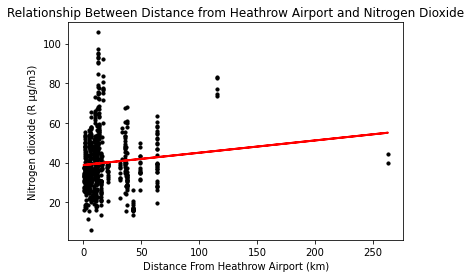

In [24]:

# remove the nan values
poll_poll = pollution_head[['Nitrogen dioxide', 'distance_from_LHR']].dropna()


X_1 = poll_poll['distance_from_LHR'].values.reshape(-1,1)
Y_1 = poll_poll['Nitrogen dioxide'].values.reshape(-1,1)

lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_1, Y_1)

print("The linear model for Nitrogen Dioxide and distance from airport is is is: Y = {:.5} + {:.5}X"
      .format(lin_reg_1.intercept_[0], lin_reg_1.coef_[0][0]))


predictions = lin_reg_1.predict(X_1)


plt.scatter(
    poll_poll['distance_from_LHR'],
    poll_poll['Nitrogen dioxide'],
    c='black',
    s=10
)
plt.plot(
    poll_poll['distance_from_LHR'],
    predictions,
    c='red',
    linewidth=2
)

plt.xlabel('Distance From Heathrow Airport (km)')
plt.ylabel('Nitrogen dioxide (R µg/m3)')
plt.title('Relationship Between Distance from Heathrow Airport and Nitrogen Dioxide')
plt.show()

The linear model for PM10 and distance from airport is is is: Y = 21.391 + 0.054335X


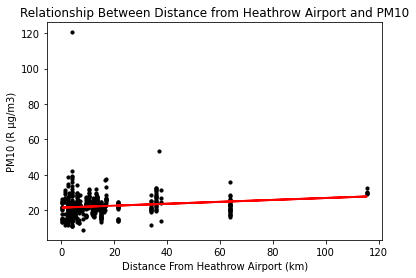

In [25]:

# remove the nan values
poll_poll = pollution_head[['PM10', 'distance_from_LHR']].dropna()


X_1 = poll_poll['distance_from_LHR'].values.reshape(-1,1)
Y_1 = poll_poll['PM10'].values.reshape(-1,1)

lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_1, Y_1)

print("The linear model for PM10 and distance from airport is is is: Y = {:.5} + {:.5}X"
      .format(lin_reg_1.intercept_[0], lin_reg_1.coef_[0][0]))


predictions = lin_reg_1.predict(X_1)


plt.scatter(
    poll_poll['distance_from_LHR'],
    poll_poll['PM10'],
    c='black',
    s=10,
)
plt.plot(
    poll_poll['distance_from_LHR'],
    predictions,
    c='red',
    linewidth=2
)

plt.xlabel('Distance From Heathrow Airport (km)')
plt.ylabel('PM10 (R µg/m3)')
plt.title('Relationship Between Distance from Heathrow Airport and PM10')
plt.show()

The linear model for PM2.5 and distance from airport is is is: Y = 8.4694 + 0.27611X


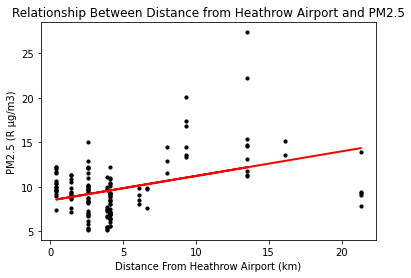

In [26]:
# remove the nan values
poll_poll = pollution_head[['PM2.5', 'distance_from_LHR']].dropna()


X_1 = poll_poll['distance_from_LHR'].values.reshape(-1,1)
Y_1 = poll_poll['PM2.5'].values.reshape(-1,1)

lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_1, Y_1)

print("The linear model for PM2.5 and distance from airport is is is: Y = {:.5} + {:.5}X"
      .format(lin_reg_1.intercept_[0], lin_reg_1.coef_[0][0]))


predictions = lin_reg_1.predict(X_1)


plt.scatter(
    poll_poll['distance_from_LHR'],
    poll_poll['PM2.5'],
    c='black',
    s=10,
)
plt.plot(
    poll_poll['distance_from_LHR'],
    predictions,
    c='red',
    linewidth=2
)

plt.xlabel('Distance From Heathrow Airport (km)')
plt.ylabel('PM2.5 (R µg/m3)')
plt.title('Relationship Between Distance from Heathrow Airport and PM2.5')
plt.show()

In [27]:
# remove the nan values
poll_poll = pollution_head[['Nitrogen dioxide', 'distance_from_LHR']].dropna()

print('Outputting regression summary results for Nitrogen Dioxide and Distance from Heathrow \n')
X = poll_poll['distance_from_LHR']
Y = poll_poll['Nitrogen dioxide']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

Outputting regression summary results for Nitrogen Dioxide and Distance from Heathrow 

                            OLS Regression Results                            
Dep. Variable:       Nitrogen dioxide   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.321
Date:                Fri, 12 Feb 2021   Prob (F-statistic):             0.0122
Time:                        15:47:27   Log-Likelihood:                -2758.0
No. Observations:                 675   AIC:                             5520.
Df Residuals:                     673   BIC:                             5529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [28]:
# remove the nan values
poll_poll = pollution_head[['PM10', 'distance_from_LHR']].dropna()

print('Outputting regression summary results for PM10 and Distance from Heathrow \n')
X = poll_poll['distance_from_LHR']
Y = poll_poll['PM10']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

Outputting regression summary results for PM10 and Distance from Heathrow 

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     10.20
Date:                Fri, 12 Feb 2021   Prob (F-statistic):            0.00149
Time:                        15:47:27   Log-Likelihood:                -1595.5
No. Observations:                 473   AIC:                             3195.
Df Residuals:                     471   BIC:                             3203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [29]:
# remove the nan values
poll_poll = pollution_head[['PM2.5', 'distance_from_LHR']].dropna()

print('Outputting regression summary results for PM2.5 and Distance from Heathrow \n')
X = poll_poll['distance_from_LHR']
Y = poll_poll['PM2.5']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

Outputting regression summary results for PM2.5 and Distance from Heathrow 

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     26.49
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           9.00e-07
Time:                        15:47:27   Log-Likelihood:                -349.05
No. Observations:                 139   AIC:                             702.1
Df Residuals:                     137   BIC:                             708.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

### Generate the regression table (cross check with previous results table)

In [1]:
def create_regression_table_v1(df, indicators, x_variable):
    # v1, works with many y values and one x variable column (e.g. distance...)
    # v2 will need to tweak the xvariable into a list or something...
    
    list_o_test_frames = []
    
    # remove characters not supported by OLD model input
    cols = [x.replace(' ', '_').replace('(', '').replace(')', '').replace('<', 'Over_').replace(':', '').replace('.', '') for x in df.columns.tolist()]
    df.columns = cols

    OUTPUT_COLS = ['Indicator Name', 'R Squared', 'Correlation Coef (R)', 'Coefficient Name', 'Coefficient Value', 'P Value', 'Significance (5%)']

    for indicator in indicators:
        print('Running regression for {0} against Flights'.format(indicator))

        tmp = df.copy()[[indicator, x_variable]].dropna()

        model2 = '{0}~{1}'.format(indicator, x_variable)
        lm2    = ols(formula = model2, data= tmp).fit()

        err_series = lm2.params - lm2.conf_int()[0]
        coef_df = pd.DataFrame({'Coefficient Value': lm2.params.values[1:],
                                'P Value': lm2.pvalues.round(4).values[1:],
                                'Coefficient Name': err_series.index.values[1:],
                               })
        coef_df['Indicator Name'] = indicator
        coef_df['R Squared'] = lm2.rsquared
        
        # get correct sign for coefficient
        coef_df['Correlation Coef (R)'] = np.where( 
            coef_df['Coefficient Value']>0,  
            np.sqrt(coef_df['R Squared']), 
            (np.sqrt(coef_df['R Squared']) * -1)
        )
        
        coef_df['Significance (5%)'] = np.where(coef_df['P Value']< 0.05, 'Significant', 'Not Significant')
        
        coef_df = coef_df.round(3)

        list_o_test_frames.append(coef_df[OUTPUT_COLS])


    multi_regression = pd.concat(list_o_test_frames, axis=0)
    multi_regression= multi_regression.reset_index().drop(columns='index')
    return(multi_regression)

In [30]:
pollution_head.head()

,Unnamed: 0,Location,Date,Carbon monoxide,Nitric Oxide,Nitrogen dioxide,Oxides of Nitrogen,Ozone,PM10 Particulate matter,PM10,PM2.5,Sulphur dioxide,CCG,lat/long,distance_from_LHR,Radius
0,0,Hounslow 2 - Cranford,2004,NaN,19.366907,35.637110,65.183649,31.628426,22.091612,NaN,NaN,3.611565,Hounslow,"[51.4686132, -0.3613471]",6.440137,Inner
1,1,Hounslow 2 - Cranford,2005,NaN,19.282252,37.730687,66.993132,34.426010,22.159977,NaN,NaN,3.959997,Hounslow,"[51.4686132, -0.3613471]",6.440137,Inner
2,2,Hounslow 2 - Cranford,2006,NaN,16.322724,37.439653,62.493307,41.626836,22.695308,NaN,NaN,3.018580,Hounslow,"[51.4686132, -0.3613471]",6.440137,Inner
3,3,Hounslow 2 - Cranford,2007,NaN,22.751626,34.516199,69.260681,31.764437,21.877800,NaN,NaN,2.886371,Hounslow,"[51.4686132, -0.3613471]",6.440137,Inner
4,4,Hounslow 2 - Cranford,2008,NaN,19.463412,36.025263,65.728967,36.527434,19.221030,NaN,NaN,3.046298,Hounslow,"[51.4686132, -0.3613471]",6.440137,Inner


In [9]:
print("GENERATING RUN FOR POLLUTION AND DISTANCE FROM HEATHROW")
letmeseeplz = create_regression_table_v1(
    pollution_head,
    ['PM10', 'Nitrogen_dioxide', 'PM25'],
    'distance_from_LHR'
)

letmeseeplz.to_csv('regression_table_output/pollution_distance_stations_linreg.csv', encoding='utf-8')

letmeseeplz

GENERATING RUN FOR POLLUTION AND DISTANCE FROM HEATHROW
Running regression for PM10 against Flights
Running regression for Nitrogen_dioxide against Flights
Running regression for PM25 against Flights


,Indicator Name,R Squared,Correlation Coef (R),Coefficient Name,Coefficient Value,P Value,Significance (5%)
0,PM10,0.021,0.146,distance_from_LHR,0.054,0.002,Significant
1,Nitrogen_dioxide,0.009,0.096,distance_from_LHR,0.062,0.012,Significant
2,PM25,0.162,0.403,distance_from_LHR,0.276,0.000,Significant
